# Pymaceuticals Inc.
---

### Analysis

- The higher the weight in the mouse the higher the tumor volume.
- The treatment with Capomulin in one mouse had significant success after a month of use.
- Ramicane had similar effectiveness to Capomulin.
 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
merged_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [9]:
# Checking the number of mice.
quantity_mice = mouse_metadata['Mouse ID'].nunique()
quantity_mice


249

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_rows = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice in the clean DataFrame.
unique_cleaned_data = cleaned_data['Mouse ID'].nunique()
unique_cleaned_data

249

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = grouped_data.mean()
median_tumor_volume = grouped_data.median()
variance_tumor_volume = grouped_data.var()
std_dev_tumor_volume = grouped_data.std()
sem_tumor_volume = grouped_data.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

# Display the summary DataFrame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Use the aggregation method to calculate the mean, median, variance, standard deviation, and SEM
summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)

# Display the summary statistics DataFrame
summary_stats

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

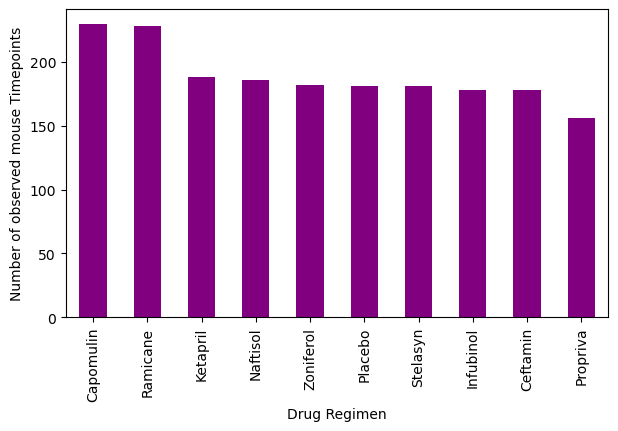

In [111]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(7,4))
drug_regimen_counts.plot(kind='bar', color='purple')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of observed mouse Timepoints')
plt.show()

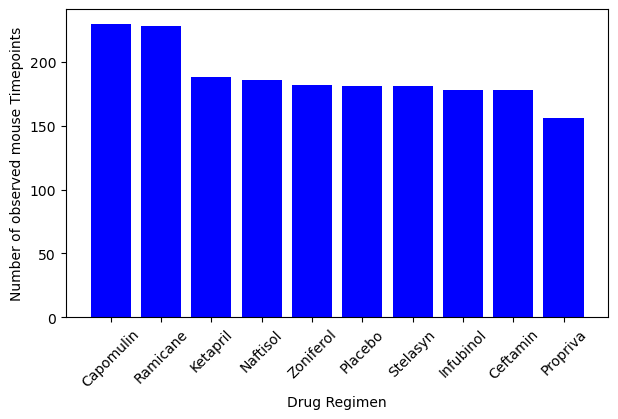

In [113]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(7,4))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of observed mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

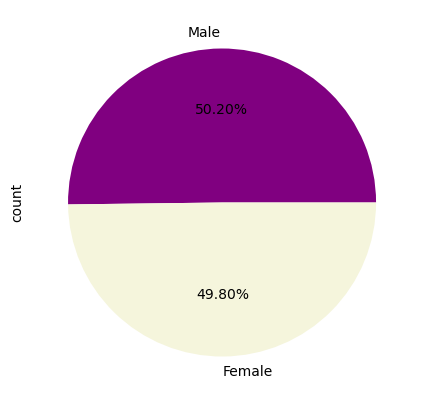

In [94]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plt.figure(figsize=(5,5))
gender_distribution.plot(kind='pie', autopct='%1.2f%%', colors=['purple', 'beige'])
plt.show()

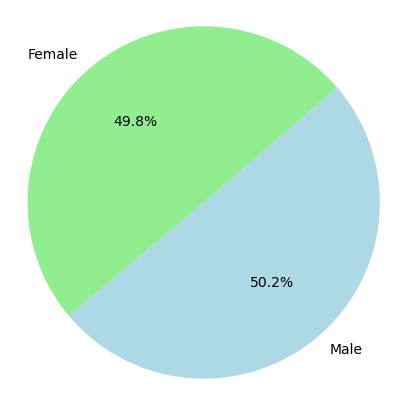

In [121]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

unique_mice = mouse_metadata[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using pyplot
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=220, colors=['lightblue', 'lightgreen'])
plt.axis('equal')  

plt.show()

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_data = merged_data[merged_data['Drug Regimen'].isin(regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_last_timepoint[merged_last_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine potential outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the results
    print(f"{treatment} regimen potential outliers: {outliers}")

# Example to check if the lists are correctly populated
tumor_vol_data  


Capomulin regimen potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane regimen potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol regimen potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin regimen potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

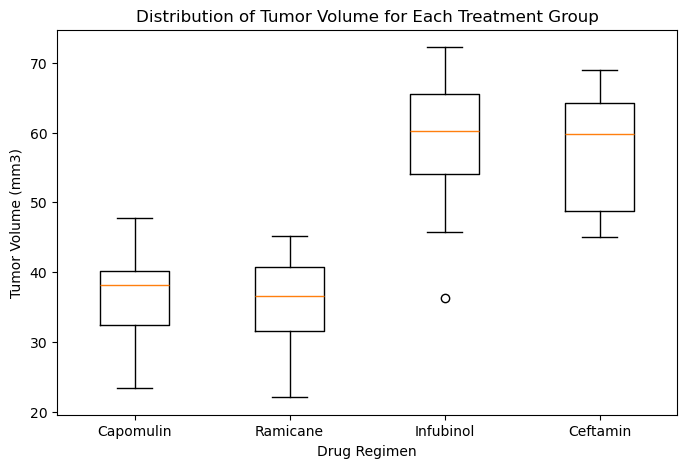

In [107]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 5))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

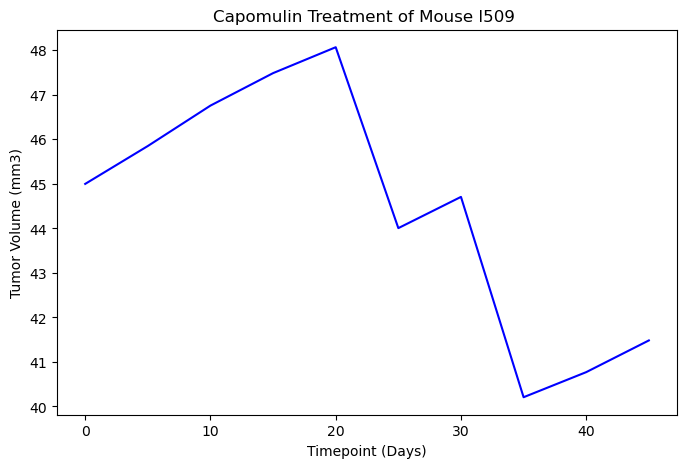

In [119]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate the line plot of tumor volume vs. time point
plt.figure(figsize=(8,5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='b')
plt.title(f'Capomulin Treatment of Mouse {mouse_id} ')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
 
plt.show()

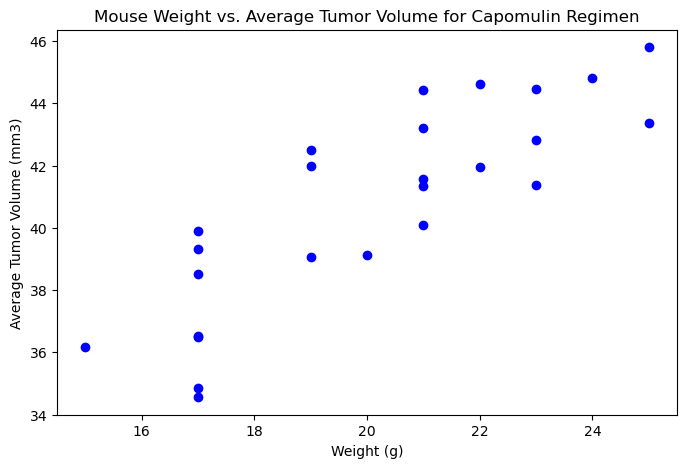

In [158]:
# Generate the scatter plot
plt.figure(figsize=(8,5))
plt.scatter(merged_avg_data['Weight (g)'], merged_avg_data['Avg Tumor Volume (mm3)'], color='b')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

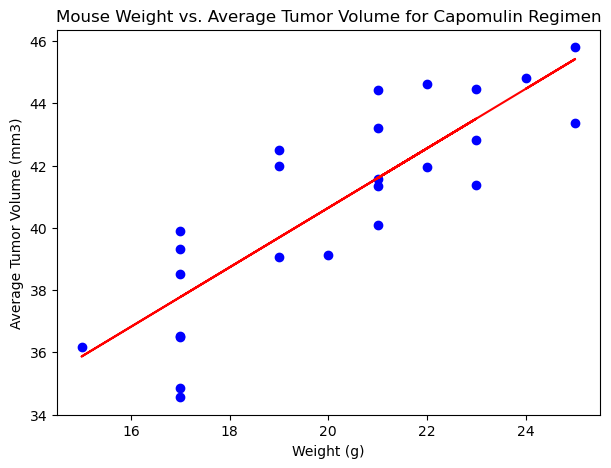

In [91]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

merged_avg_data = pd.merge(mouse_metadata, avg_tumor_volume, on='Mouse ID')

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_avg_data['Weight (g)'], merged_avg_data['Avg Tumor Volume (mm3)'])

# Calculate the correlation coefficient
correlation_coef = merged_avg_data['Weight (g)'].corr(merged_avg_data['Avg Tumor Volume (mm3)'])

plt.figure(figsize=(7,5))
plt.scatter(merged_avg_data['Weight (g)'], merged_avg_data['Avg Tumor Volume (mm3)'], color='b')
plt.plot(merged_avg_data['Weight (g)'], merged_avg_data['Weight (g)'] * slope + intercept, color='r', label=f'Linear regression\n($r^2$={r_value**2:.2f})')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()